<a href="https://colab.research.google.com/github/saks0106/Frequent-Lookouts/blob/main/cross_val_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression , LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('/content/pima-indians-diabetes-2.csv')
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [7]:
x = df.drop('class',axis=1)
y = df['class']

#KFold Cross Validation-If min and max range is big, Hyperparameter Tuning is needed

In [8]:
num_folds = 50 #k, default k=5
seed = 42
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model,x,y,cv=kfold)
print(results)
results.mean() # accuracy of 77% of all 50 folds

[0.625      0.8125     0.8125     0.75       0.875      0.75
 0.875      0.8125     0.8125     0.875      0.625      0.75
 0.8125     0.8125     0.6875     0.75       0.875      0.9375
 0.73333333 0.93333333 0.73333333 0.86666667 0.86666667 0.93333333
 0.73333333 0.6        0.73333333 0.8        0.53333333 0.8
 0.66666667 0.93333333 0.86666667 0.93333333 0.86666667 0.86666667
 0.66666667 0.6        0.73333333 0.86666667 0.53333333 0.8
 0.73333333 0.8        0.66666667 0.93333333 0.66666667 0.66666667
 0.73333333 0.93333333]


0.7796666666666665

#Stratified K-Fold Cross Validation
When dependent feature is in not balanced, like 80:20 then use this

In [9]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5)
results = cross_val_score(model,x,y,cv=skfold)
print(results)



[0.77272727 0.74675325 0.75974026 0.81699346 0.75163399]


#Leave One Out Cross Validation
  If 100 is the shape ie rows in dataset, use 99 as training and 1 as testing but randomly and repeat this n times

In [10]:
from sklearn.model_selection import LeaveOneOut

leave = LeaveOneOut()
results = cross_val_score(model,x,y,cv=leave,scoring='accuracy')
print(results)
np.mean(results)

[1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.

0.7786458333333334

#Repeated Random Train_Test Split 
Hybrid of Kfold and Stratified

In [11]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=5)
results = cross_val_score(model,x,y,cv=ss)
print(results)



[0.80519481 0.80519481 0.79220779 0.79220779 0.74025974]


#Bootstrap Sampling 
Sampling with Replacement

In [12]:
from sklearn.utils import resample
import numpy as np
data = [1,2,3,4,5,6,7,8,9,10]
n_iterations = 10
n_size = int(len(data)*1)
for i in range(n_iterations):
  train = resample(data, n_samples=n_size) 
  test = np.array([x for x in data if x not in  train])
  print('train data: ',train, ' ', 'test data: ',test)

train data:  [3, 5, 6, 5, 9, 10, 3, 9, 5, 3]   test data:  [1 2 4 7 8]
train data:  [5, 9, 8, 8, 1, 10, 10, 7, 7, 2]   test data:  [3 4 6]
train data:  [9, 9, 3, 10, 4, 8, 5, 8, 9, 5]   test data:  [1 2 6 7]
train data:  [8, 3, 8, 6, 1, 7, 10, 8, 7, 7]   test data:  [2 4 5 9]
train data:  [9, 5, 3, 7, 7, 8, 4, 4, 5, 2]   test data:  [ 1  6 10]
train data:  [7, 5, 1, 7, 7, 4, 1, 9, 10, 1]   test data:  [2 3 6 8]
train data:  [2, 8, 7, 5, 7, 9, 1, 6, 2, 2]   test data:  [ 3  4 10]
train data:  [4, 9, 1, 9, 2, 4, 1, 9, 9, 3]   test data:  [ 5  6  7  8 10]
train data:  [6, 8, 4, 1, 9, 3, 7, 8, 8, 3]   test data:  [ 2  5 10]
train data:  [6, 10, 9, 7, 10, 1, 3, 9, 7, 3]   test data:  [2 4 5 8]


In [13]:
#Appling Bootstrap Sampling on Dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import pandas as pd

In [14]:
df = pd.read_csv('/content/pima-indians-diabetes-2.csv')
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
values = df.values
n_iterations = 10
n_size = int(len(df)*1)
scores = list()
for i in range(n_iterations):
  train = resample(values,n_samples=n_size)
  test = np.array([x for x in values if x.tolist() not in  train.tolist()])
  rfc = RandomForestClassifier()
  rfc.fit(train[:,:-1], train[:,-1])
  predictions = rfc.predict(test[:,:-1])
  score = accuracy_score(test[:,-1], predictions)
  print(score)
  scores.append(score)


0.7378277153558053
0.7338403041825095
0.7279151943462897
0.7508896797153025
0.7440273037542662
0.762962962962963
0.7465753424657534
0.7962264150943397
0.7429577464788732
0.7730496453900709


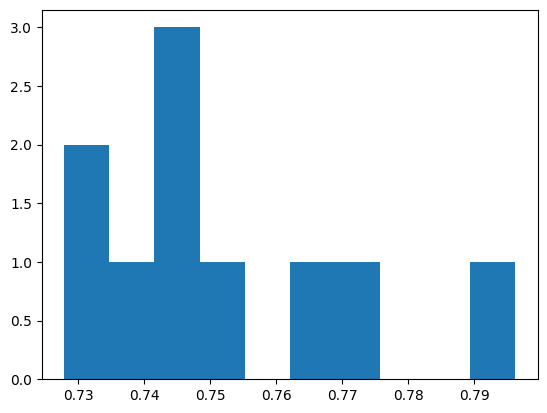

95.0 confidence interval 72.9% and 79.1%


In [16]:
pyplot.hist(scores)
pyplot.show()
alpha = 0.95
p = ((1.0-alpha)/2.0)*100
lower =  max(0.0,np.percentile(scores,p))
p = (alpha+((1.0-alpha)/2.0))*100
upper = min(1.0,np.percentile(scores,p))
print('%.1f confidence interval %.1f%% and %.1f%%' %(alpha*100,lower*100,upper*100))